In [1]:
import pandas as pd

# US Covid Cases

In [2]:
cdf = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-26-2020.csv')
cdf.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-27 04:35:15,32.3182,-86.9023,79294,1473,32510.0,45311.0,1,1617.193722,649686.0,9157.0,1.857644,84000001,USA,13250.285274,11.548163
1,Alaska,US,2020-07-27 04:35:15,61.3707,-152.4044,2525,20,817.0,1688.0,2,345.159901,207264.0,NaN,0.792079,84000002,USA,28332.365063,NaN
2,American Samoa,US,2020-07-27 04:35:15,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1037.0,NaN,NaN,16,ASM,1863.733578,NaN
3,Arizona,US,2020-07-27 04:35:15,33.7298,-111.4312,162014,3305,20978.0,137731.0,4,2225.859310,867103.0,7706.0,2.039947,84000004,USA,11912.854972,4.756379
4,Arkansas,US,2020-07-27 04:35:15,34.9697,-92.3731,38623,401,31622.0,6600.0,5,1279.837922,477267.0,2542.0,1.038241,84000005,USA,15815.042992,6.581571


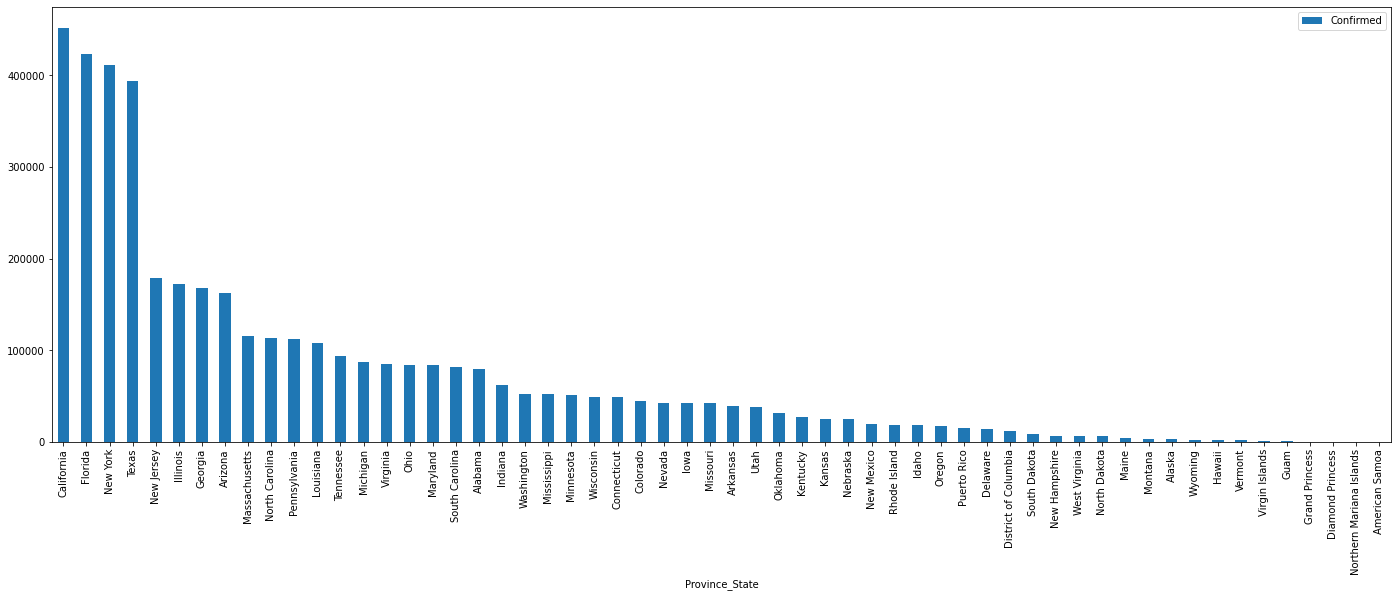

In [3]:
cdf = cdf.sort_values('Confirmed', ascending=False)
cdf.plot.bar(x='Province_State', y='Confirmed', figsize=(24,8))

California has the most number of Covid cases.

# Cases per Capita

In [4]:
pdf = pd.read_csv('state-populations.csv')
pdf.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39937500,0.0096,39557000,37320900,0.0701,0.1194,256.3728
1,2,Texas,29472300,0.0268,28701800,25242700,0.1676,0.0881,112.8204
2,3,Florida,21993000,0.0326,21299300,18845800,0.1670,0.0658,410.1259
3,4,New York,19440500,-0.0052,19542200,19400100,0.0021,0.0581,412.5218
4,5,Pennsylvania,12820900,0.0011,12807100,12711200,0.0086,0.0383,286.5454


In [5]:
df = pd.merge(cdf, pdf, left_on='Province_State', right_on='State')
df['Percent_Confirmed'] = df['Confirmed'] / df['Pop'] * 100
df = df.sort_values('Percent_Confirmed', ascending=False)
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density,Percent_Confirmed
11,Louisiana,US,2020-07-27 04:35:15,31.1695,-91.8678,107574,3763,61456.0,42355.0,22,...,25,Louisiana,4645180,-0.0032,4659980,4544530,0.0221,0.0139,107.5174,2.315820
7,Arizona,US,2020-07-27 04:35:15,33.7298,-111.4312,162014,3305,20978.0,137731.0,4,...,14,Arizona,7378490,0.0288,7171650,6407770,0.1515,0.0221,64.9549,2.195761
2,New York,US,2020-07-27 04:35:15,42.1657,-74.9481,411736,32630,72716.0,306390.0,36,...,4,New York,19440500,-0.0052,19542200,19400100,0.0021,0.0581,412.5218,2.117929
4,New Jersey,US,2020-07-27 04:35:15,40.2989,-74.5210,179363,15787,32133.0,131443.0,34,...,11,New Jersey,8936570,0.0031,8908520,8799620,0.0156,0.0267,1215.1985,2.007068
1,Florida,US,2020-07-27 04:35:15,27.7663,-81.6868,423855,5854,NaN,418001.0,12,...,3,Florida,21993000,0.0326,21299300,18845800,0.1670,0.0658,410.1259,1.927227


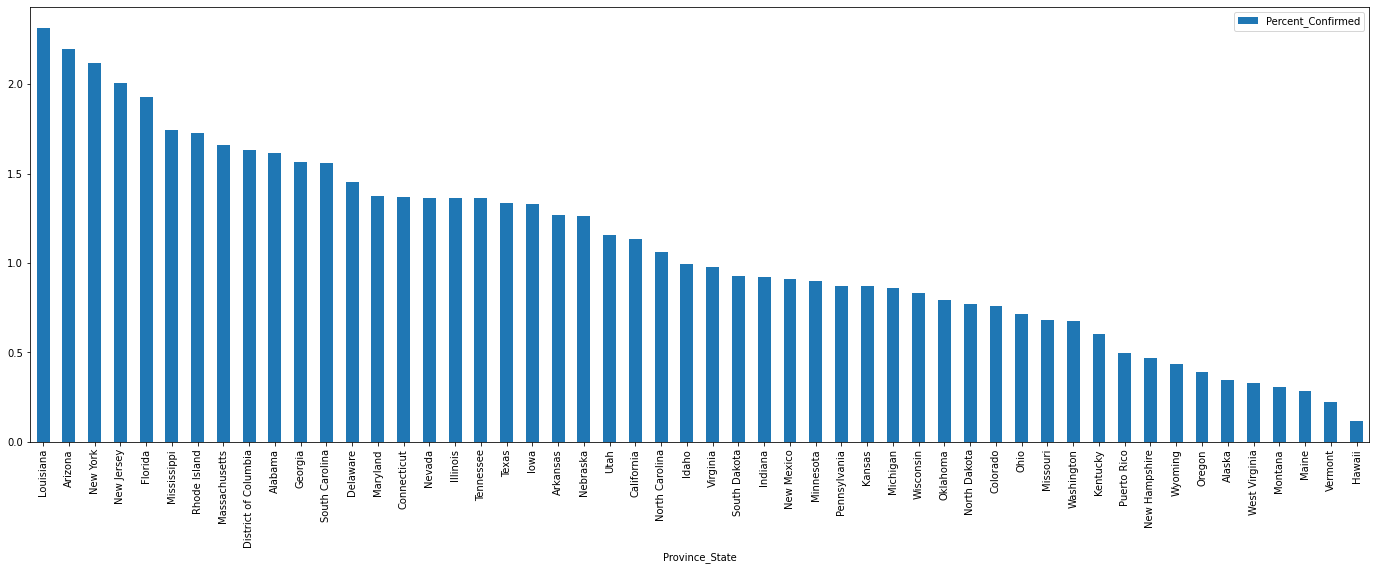

In [6]:
df.plot.bar(x='Province_State', y='Percent_Confirmed', figsize=(24,8))

# Positivity Rate

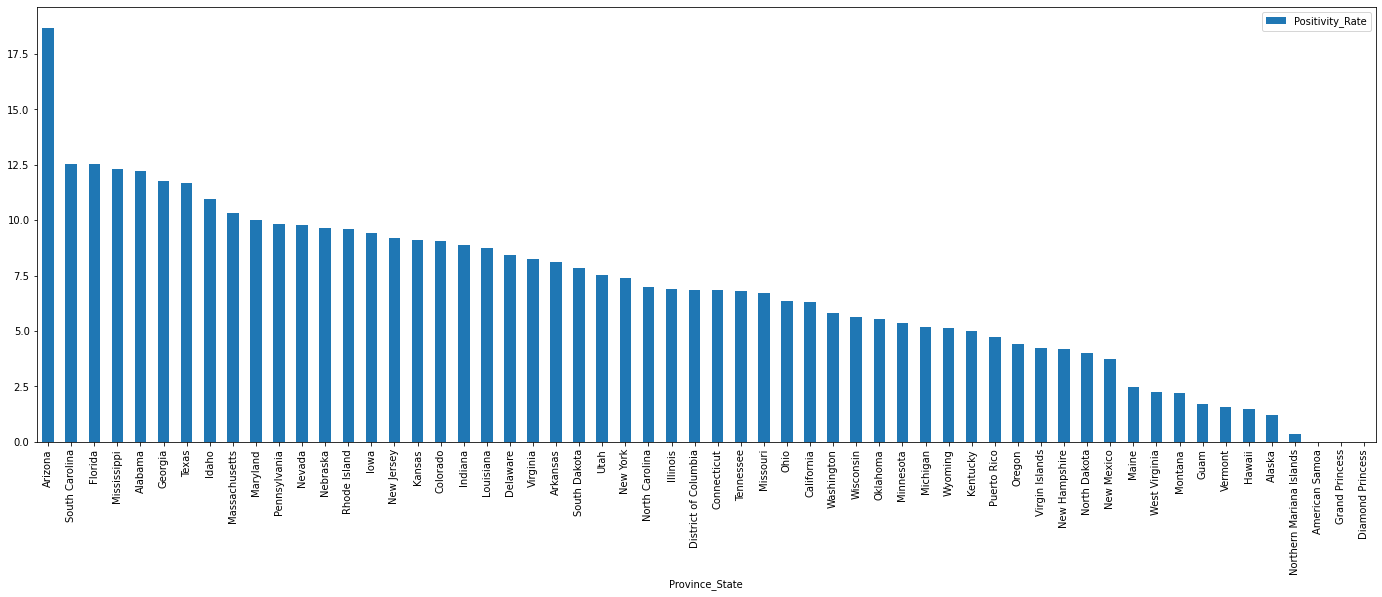

In [7]:
cdf['Positivity_Rate'] = cdf['Confirmed'] / cdf['People_Tested'] * 100
cdf = cdf.sort_values('Positivity_Rate', ascending=False)
cdf.plot.bar(x='Province_State', y='Positivity_Rate', figsize=(24, 8))